# **SELF_EXERCISE**

In [5]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk. corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [9]:
# Step 1: Define Input Text (Corpus)
text = [
"I love natural language processing",
"Word embeddings are amazing for NLP",
"NLP includes tasks like text classification",
"Deep learning models improve word embeddings"
]

In [15]:
#Step 2: Tokenize the Text into Sentences of Words
# Download NLTK resources
nltk. download('punkt_tab')
nltk. download('stopwords')
stop_words = set(stopwords. words ('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Tokenize and clean the sentences
tokenized_sentences = []
for sentence in text:
  tokens = word_tokenize(sentence. lower()) # Tokenize into words and convert to lowercase
  # Remove stopwords and non-alphanumeric words
  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  tokenized_sentences.append(filtered_tokens)

In [17]:
# Step 3: Train the Word2Vec Model
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=3, min_count=1, sg=1)

In [18]:
# Step 4: Extract Word Embeddings for Visualization
# Get the list of words and their embeddings
words = list(model.wv.index_to_key) # All words in the vocabulary
embeddings = np.array ([model. wv[word] for word in words]) # Corresponding embeddings

In [19]:
# Step 5: Reduce Dimensionality Using T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5) # Reduce to 2D
embeddings_2d = tsne.fit_transform(embeddings)

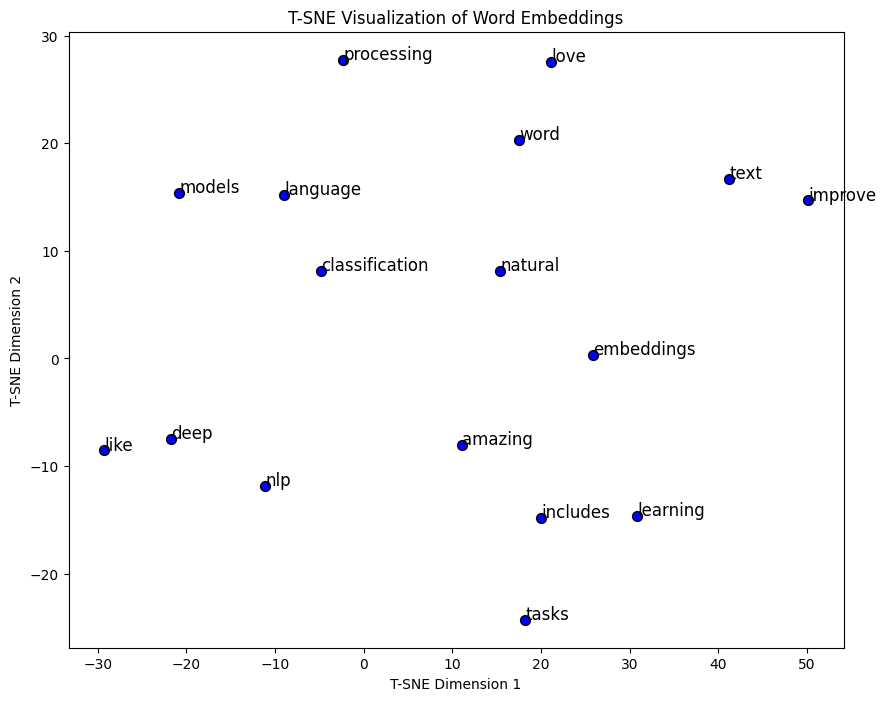

In [21]:
# Step 6: Plot the Words in 2D Space
plt. figure(figsize=(10, 8))
for i, word in enumerate(words) :
  x, y = embeddings_2d[i]
  plt. scatter (x, y, edgecolors='k', c='blue', s=50)
  plt.text (x + 0.05, y + 0.05, word, fontsize=12)
plt.title("T-SNE Visualization of Word Embeddings")
plt.xlabel ("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt. show()